In [2]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [3]:
# Load data from the pickle file
data_dict = pickle.load(open('./data.pickle', 'rb'))

# Check lengths of each data sample to ensure consistency
data = data_dict['data']
labels = data_dict['labels']


In [4]:
# Data Preprocessing (Ensure all samples are the same length)
sample_length = len(data[0])
filtered_data = [sample for sample in data if len(sample) == sample_length]
filtered_labels = [label for i, label in enumerate(labels) if len(data[i]) == sample_length]


In [5]:
# Convert to numpy arrays
data_array = np.asarray(filtered_data)
labels_array = np.asarray(filtered_labels)


In [6]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    data_array, labels_array, test_size=0.2, shuffle=True, stratify=labels_array
)


In [7]:
# Train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [8]:
# Predict and evaluate accuracy
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)

print(f'{score * 100:.2f}% of samples were classified correctly!')


95.55% of samples were classified correctly!


In [18]:
# Save the trained model
with open('model.p', 'wb') as f:
    pickle.dump({'model': model}, f)


In [11]:
# Train-test split
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(
    data_array, labels_array, test_size=0.2, shuffle=True, stratify=labels_array
)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict on test set
y_predict = model.predict(x_test)

# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 95.35%


Confusion Matrix:
[[ 60   0   0   0   0   0   0   0   0   0]
 [  1 125   3   0   0   0   1   2   0   1]
 [  1   7 100   2   0   0   1   0   0   0]
 [  0   1   0 175   0   0   1   0   0   0]
 [  0   2   1   0 103   8   1   2   0   0]
 [  0   0   0   1   0 242   1   0   1   1]
 [  0   3   5   0   0   0 111   2   0   0]
 [  0   0   0   1   2   0   4 179   0   0]
 [  0   0   0   0   2   1   1   4 174   1]
 [  0   0   0   1   2   2   0   0   0 165]]


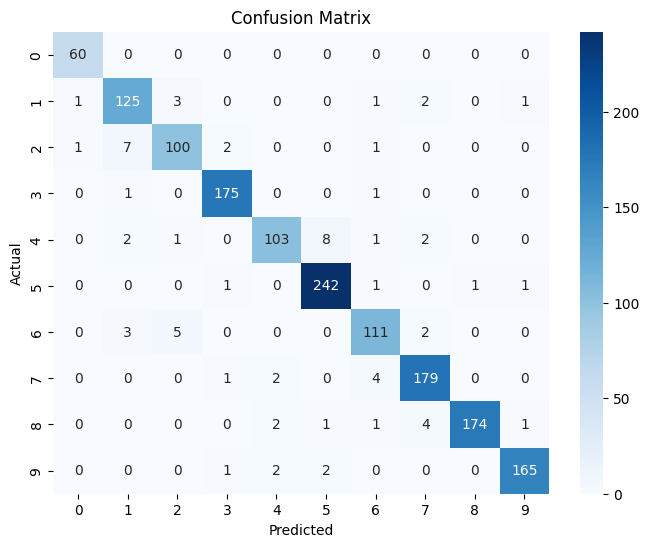

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# Classification report
class_report = classification_report(y_test, y_predict)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.91      0.94      0.92       133
           2       0.92      0.90      0.91       111
           3       0.97      0.99      0.98       177
           4       0.94      0.88      0.91       117
           5       0.96      0.98      0.97       246
           6       0.92      0.92      0.92       121
           7       0.95      0.96      0.95       186
           8       0.99      0.95      0.97       183
           9       0.98      0.97      0.98       170

    accuracy                           0.95      1504
   macro avg       0.95      0.95      0.95      1504
weighted avg       0.95      0.95      0.95      1504



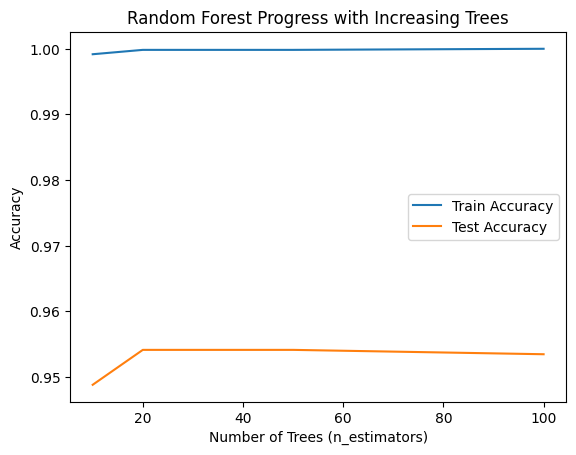

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_list = [10, 20, 50, 100]
train_accuracies = []
test_accuracies = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(x_train, y_train)

    # Evaluate on train and test sets
    train_accuracies.append(accuracy_score(y_train, model.predict(x_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(x_test)))

# Plot the progress
import matplotlib.pyplot as plt
plt.plot(n_estimators_list, train_accuracies, label='Train Accuracy')
plt.plot(n_estimators_list, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Progress with Increasing Trees')
plt.legend()
plt.show()

